**Dataset description**: Fertilized corn crop in Nebraska.

Corn Trial conducted jointly with Dennis Francis and Jim Schepers, USDA-ARS, University of Nebraska, Lincoln, NE.  Corn trial located near Shelton, NE. Harvested in October, 2003

Source: <http://www.nue.okstate.edu/Nitrogen_Conference2003/Corn_Research.htm>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Fit polynomial: Example using yield responses to nitrogen rates
corn_yield_obs = [118,165,170,193,180,181,141,177,165,197,175]
nitrogen_rate =  [0,89,161,165,80,160,37,105,69,123,141]


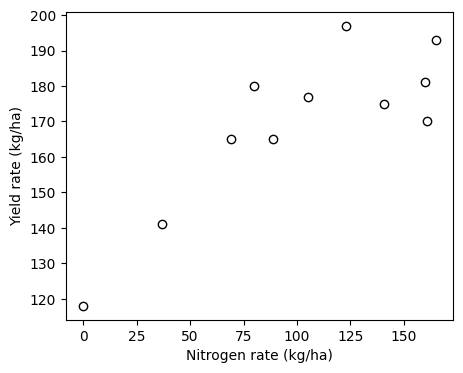

In [10]:
# Visualize field observations
plt.figure(figsize=(5,4))
plt.scatter(nitrogen_rate,corn_yield_obs, facecolor='w', edgecolor='k')
plt.xlabel('Nitrogen rate (kg/ha)')
plt.ylabel('Yield rate (kg/ha)')
plt.show()


In [5]:
par = np.polyfit(nitrogen_rate, corn_yield_obs, 2)
print(par)

# When full=False (the default) just the coefficients are returned.
# When full=True diagnostic information is also provided.


[-3.41221057e-03  9.61329119e-01  1.15569115e+02]


In [6]:
# Create object that we can call to run the polynomial with the fitted coefficients
polyfun = np.poly1d(par) # Create object
print(polyfun) # polynomial function


           2
-0.003412 x + 0.9613 x + 115.6


In [7]:
# Compute fitting error
corn_yield_pred = polyfun(nitrogen_rate);
rmse = np.sqrt(np.mean((corn_yield_obs - corn_yield_pred)**2))
print(round(rmse,1),'kg/ha')

8.4 kg/ha


In [8]:
# Compute fitted curve
nitrogen_rate_pred = np.arange(np.min(nitrogen_rate),np.max(nitrogen_rate),0.1)
corn_yield_pred = polyfun(nitrogen_rate_pred)

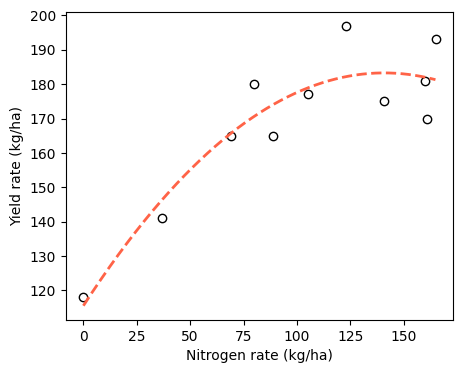

In [11]:
# Visualize field observations
plt.figure(figsize=(5,4))
plt.scatter(nitrogen_rate, corn_yield_obs, facecolor='w', edgecolor='k', label='Observations')
plt.plot(nitrogen_rate_pred, corn_yield_pred, 
         color='tomato',linestyle='dashed', linewidth=2, label='Fit')

plt.xlabel('Nitrogen rate (kg/ha)')
plt.ylabel('Yield rate (kg/ha)')
plt.show()



In [13]:
first_derivative = np.diff(corn_yield_pred,n=1) # One value shorter


#f.line(nitrogen_rate_pred[:-1], first_derivative)
#f.line(nitrogen_rate_pred[:-1], y=0, line_dash='dashed', line_color='red')


#plt.figure(figsize=(5,4))
#plt.scatter(nitrogen_rate, corn_yield_obs, facecolor='w', edgecolor='k', label='Observations')
#plt.plot(nitrogen_rate_pred, corn_yield_pred, 
#         color='tomato',linestyle='dashed', linewidth=2, label='Fit')
#plt.(nitrogen_rate_pred[:-1], first_derivative)
#plt.xlabel('Nitrogen rate (kg/ha)')
#plt.ylabel('Yield rate (kg/ha)')
#plt.show()


In [14]:
idx_lowest_derivative = np.argmin(np.abs(first_derivative))
opt_nitrogen_rate = nitrogen_rate_pred[idx_lowest_derivative]
print(opt_nitrogen_rate )

140.8
